### Práctica adicional - Recaudación SPN

Llamo las librerias pandas y matplotlib que voy a utilizar en el ejemplo.

In [274]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot') 

Con el objetivo de mostrar la evolución de la Recaudación del Sector Público Nacional y los componentes más influyentes en los períodos analizados:

1) Llamamos a las series de interés en un sólo link utilizando los recursos de la API.


In [302]:
#Genero la variable reca_total con la info en csv original de la página datos.gob.ar. 
reca_total= pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=172.3_TL_RECAION_M_0_0_17,452.2_APORTES_COIAL_0_T_39_29,452.2_BIENES_PERLES_0_T_17_26,452.2_COMBUSTIBLLES_0_T_12_97,452.2_DEBITOS_CRTOS_0_T_16_22,452.2_DERECHOS_EION_0_T_20_42,452.2_DERECHOS_IION_0_T_20_60,452.2_GANANCIASIAS_0_T_9_51,452.2_IMPUESTOS_NOS_0_T_18_87,452.2_INGRESOS_CTAL_0_T_16_75,452.2_IVA_NETO_RROS_0_T_19_67,452.2_RESTO_RENTDAD_0_T_22_24,452.2_RESTO_TRIBIOS_0_T_17_0,452.2_RESTO_RENTDAD_0_T_22_24&limit=5000&format=csv")

2) Convertimos en "datetime" al campo "indice_de_tiempo".

In [303]:
#Transformo en fecha el campo índice_tiempo
reca_total["indice_tiempo"] = pd.to_datetime(reca_total["indice_tiempo"])
#Tranformo el campo índice_tiempo en el índice del dataframe


3) Tomamos los datos desde 2016.

In [304]:
#reca_total = reca_total.set_index("indice_tiempo")
reca_total=reca_total[reca_total.indice_tiempo>="2016-01-01"]
reca_total.head()

,indice_tiempo,total_recaudacion,aportes_contribuciones_seguridad_social,bienes_personales,combustibles,debitos_creditos,derechos_exportacion,derechos_importacion,ganancias,impuestos_internos,ingresos_capital,iva_neto_reintegros,resto_rentas_propiedad,resto_tributarios,resto_rentas_propiedad.1
228,2016-01-01,162654.151319,50824.0,161.6,1115.1,7764.7,5102.6,3846.0,20340.3,1569.5,2.8,20467.30,270.3,5140.20,270.3
229,2016-02-01,134803.277269,37246.3,559.4,1960.3,7232.6,3511.5,3678.7,15531.2,1692.4,5.1,20109.65,234.1,4319.14,234.1
230,2016-03-01,137762.369260,37906.8,160.1,1854.7,7890.7,6749.9,4679.5,12671.4,1590.1,16.9,21943.30,480.9,4286.80,480.9
231,2016-04-01,150809.702557,42730.7,380.9,1893.8,8815.4,12214.0,4630.4,11897.8,1683.0,2.7,22904.30,493.3,4854.40,493.3
232,2016-05-01,170344.610158,42640.1,2287.6,1904.8,8918.6,8199.3,4518.7,25960.7,2108.2,85.8,26738.40,1007.5,5856.20,1007.5


4) Corroboro que todos los campos tengan la misma cantidad de registros no nulos con los que trabajar y me aseguro de contar con un campo a utilizar como índice temporal. 

In [305]:
reca_total = reca_total.set_index("indice_tiempo")
reca_total.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43 entries, 2016-01-01 to 2019-07-01
Data columns (total 14 columns):
total_recaudacion                          43 non-null float64
aportes_contribuciones_seguridad_social    43 non-null float64
bienes_personales                          43 non-null float64
combustibles                               43 non-null float64
debitos_creditos                           43 non-null float64
derechos_exportacion                       43 non-null float64
derechos_importacion                       43 non-null float64
ganancias                                  43 non-null float64
impuestos_internos                         43 non-null float64
ingresos_capital                           43 non-null float64
iva_neto_reintegros                        43 non-null float64
resto_rentas_propiedad                     43 non-null float64
resto_tributarios                          43 non-null float64
resto_rentas_propiedad.1                   43 non-null flo

In [306]:
reca_total.columns.tolist()
#al transformar "indice_tiempo" en el índice de la tabla ya no la reconoce como columna sino como índice.

['total_recaudacion',
 'aportes_contribuciones_seguridad_social',
 'bienes_personales',
 'combustibles',
 'debitos_creditos',
 'derechos_exportacion',
 'derechos_importacion',
 'ganancias',
 'impuestos_internos',
 'ingresos_capital',
 'iva_neto_reintegros',
 'resto_rentas_propiedad',
 'resto_tributarios',
 'resto_rentas_propiedad.1']

4)  Si no lo hice antes, planteo el tipo de agrupación de los datos para lograr una mejor visualización. 
En nuestro ejemplo al querer mostrar los datos de forma trimestral, generamos un campo con el Año-trimestre de cada registro y luego lo agrupamos.

In [307]:
reca_total["anio_trim"]= reca_total.index.year.astype(str) + " - " +reca_total.index.quarter.astype(str)+ "T" 
reca_total.head()

# mes = reca_total["indice_tiempo"].dt.month
# trim= {1:"1T", 2:"1T", 3:"1T", 4:"2T", 5:"2T", 6:"2T", 7:"3T", 8:"3T", 9:"3T", 10:"4T", 11:"4T", 12:"4T"}

# reca_total["trim"]= mes.apply(lambda x: trim[x])
# reca_total["anio"]= reca_total["indice_tiempo"].dt.year
# reca_total["trim_anio"]= reca_total["anio"].astype(str) + "-" + reca_total["trim"].astype(str)

# del reca_total["trim"]
# del reca_total["anio"]

#reca_total = reca_total.set_index("anio_trim")  -VER SI ES NECESARIO CONVERTIRLO EN ÍNDICE O USARLO SÓLO PARA LOS GRÁFICOS.

,total_recaudacion,aportes_contribuciones_seguridad_social,bienes_personales,combustibles,debitos_creditos,derechos_exportacion,derechos_importacion,ganancias,impuestos_internos,ingresos_capital,iva_neto_reintegros,resto_rentas_propiedad,resto_tributarios,resto_rentas_propiedad.1,anio_trim
indice_tiempo,,,,,,,,,,,,,,,
2016-01-01,162654.151319,50824.0,161.6,1115.1,7764.7,5102.6,3846.0,20340.3,1569.5,2.8,20467.30,270.3,5140.20,270.3,2016 - 1T
2016-02-01,134803.277269,37246.3,559.4,1960.3,7232.6,3511.5,3678.7,15531.2,1692.4,5.1,20109.65,234.1,4319.14,234.1,2016 - 1T
2016-03-01,137762.369260,37906.8,160.1,1854.7,7890.7,6749.9,4679.5,12671.4,1590.1,16.9,21943.30,480.9,4286.80,480.9,2016 - 1T
2016-04-01,150809.702557,42730.7,380.9,1893.8,8815.4,12214.0,4630.4,11897.8,1683.0,2.7,22904.30,493.3,4854.40,493.3,2016 - 2T
2016-05-01,170344.610158,42640.1,2287.6,1904.8,8918.6,8199.3,4518.7,25960.7,2108.2,85.8,26738.40,1007.5,5856.20,1007.5,2016 - 2T


In [308]:
reca_total_trim= reca_total.groupby("anio_trim").sum()
reca_total_trim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 2016 - 1T to 2019 - 3T
Data columns (total 14 columns):
total_recaudacion                          15 non-null float64
aportes_contribuciones_seguridad_social    15 non-null float64
bienes_personales                          15 non-null float64
combustibles                               15 non-null float64
debitos_creditos                           15 non-null float64
derechos_exportacion                       15 non-null float64
derechos_importacion                       15 non-null float64
ganancias                                  15 non-null float64
impuestos_internos                         15 non-null float64
ingresos_capital                           15 non-null float64
iva_neto_reintegros                        15 non-null float64
resto_rentas_propiedad                     15 non-null float64
resto_tributarios                          15 non-null float64
resto_rentas_propiedad.1                   15 non-null float64
dtype

In [309]:
reca_total_trim[:3]

,total_recaudacion,aportes_contribuciones_seguridad_social,bienes_personales,combustibles,debitos_creditos,derechos_exportacion,derechos_importacion,ganancias,impuestos_internos,ingresos_capital,iva_neto_reintegros,resto_rentas_propiedad,resto_tributarios,resto_rentas_propiedad.1
anio_trim,,,,,,,,,,,,,,
2016 - 1T,435219.797848,125977.100000,881.1,4930.1000,22888.0,15364.0,12204.2,48542.9000,4852.000,24.8,62520.2500,985.3,13746.1400,985.3
2016 - 2T,495751.044070,128400.300000,3974.0,6488.9000,26996.9,25417.3,13761.4,63132.0000,5882.000,154.5,71860.5000,1941.2,17911.4000,1941.2
2016 - 3T,514171.757950,151921.377418,1599.7,8066.4482,29238.8,17412.7,15018.5,53522.5361,6983.671,35.0,71745.5882,4281.4,21149.5744,4281.4


In [310]:
reca_total_porc= (reca_total_trim.T/reca_total_trim.total_recaudacion).T
resto_porc= reca_total_porc.sum()-1
resto_porc

total_recaudacion                          14.000000
aportes_contribuciones_seguridad_social     3.083352
bienes_personales                          -0.958962
combustibles                               -0.800790
debitos_creditos                           -0.102761
derechos_exportacion                       -0.461062
derechos_importacion                       -0.593880
ganancias                                   0.419318
impuestos_internos                         -0.825840
ingresos_capital                           -0.900503
iva_neto_reintegros                         1.080948
resto_rentas_propiedad                     -0.708130
resto_tributarios                          -0.233441
resto_rentas_propiedad.1                   -0.708130
dtype: float64

In [311]:
reca_total_trim["Otros conceptos"]= reca_total_trim.total_recaudacion*(1-resto_porc)
reca_total_trim[:4]
reca_total_porc= (reca_total_trim.T/reca_total_trim.total_recaudacion).T
reca_total_porc.T.sum()-1

anio_trim
2016 - 1T    0.721247
2016 - 2T    0.742029
2016 - 3T    0.749276
2016 - 4T    0.783230
2017 - 1T    0.769175
2017 - 2T    0.746844
2017 - 3T    0.737857
2017 - 4T    0.757357
2018 - 1T    0.763817
2018 - 2T    0.737994
2018 - 3T    0.759165
2018 - 4T    0.769176
2019 - 1T    0.753748
2019 - 2T    0.740213
2019 - 3T    0.758989
dtype: float64

In [299]:
reca_total_porc=reca_total_porc*100

In [300]:
del reca_total_porc["total_recaudacion"]


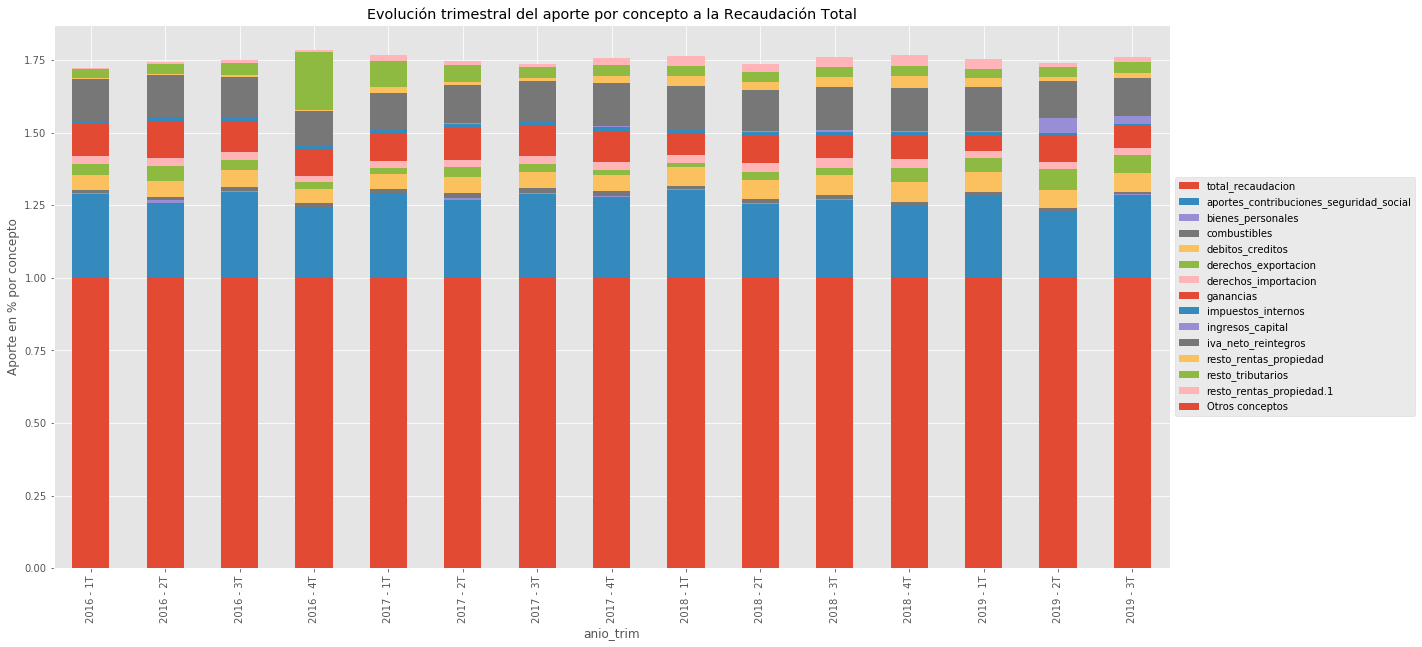

In [315]:
#DEBERÍA REHUBICAR LAS ETIQUETAS FUERA DEL ÁREA DEL GRÁFICO
reca_total_porc.plot(kind="bar", stacked=True, 
                     title="Evolución trimestral del aporte por concepto a la Recaudación Total", figsize=(20,10))

plt.ylabel("Aporte en % por concepto")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

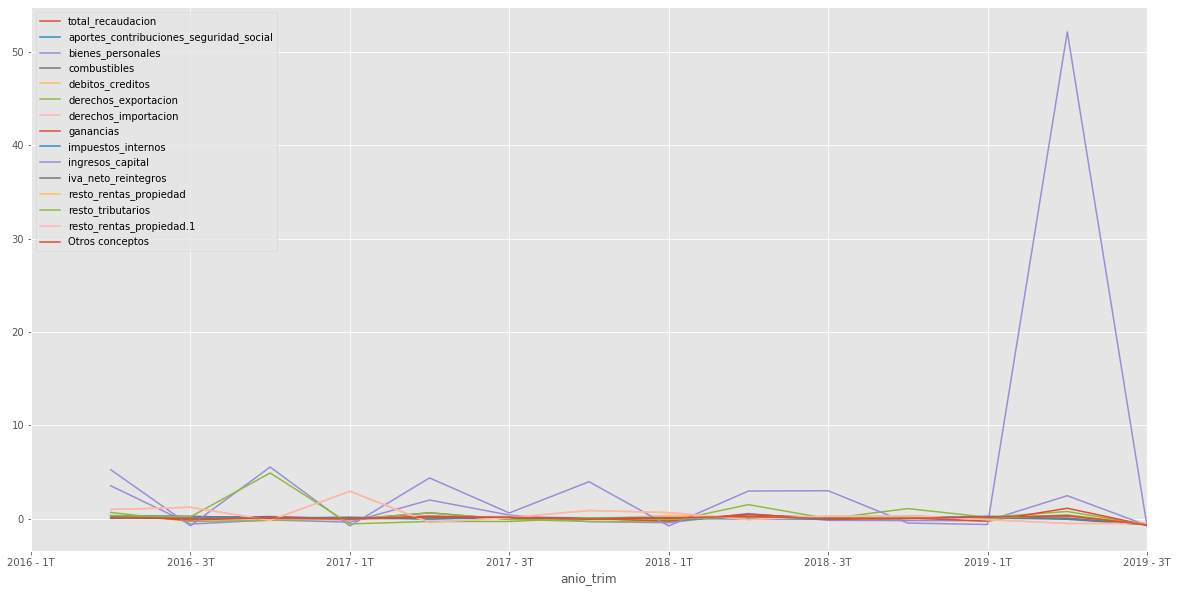

In [261]:
Var_porc_trim= reca_total_trim.pct_change(1)
Var_porc_trim.plot(figsize= (20,10))
plt.xlabel= ("anio_trim")
plt.legend(loc="upper left")

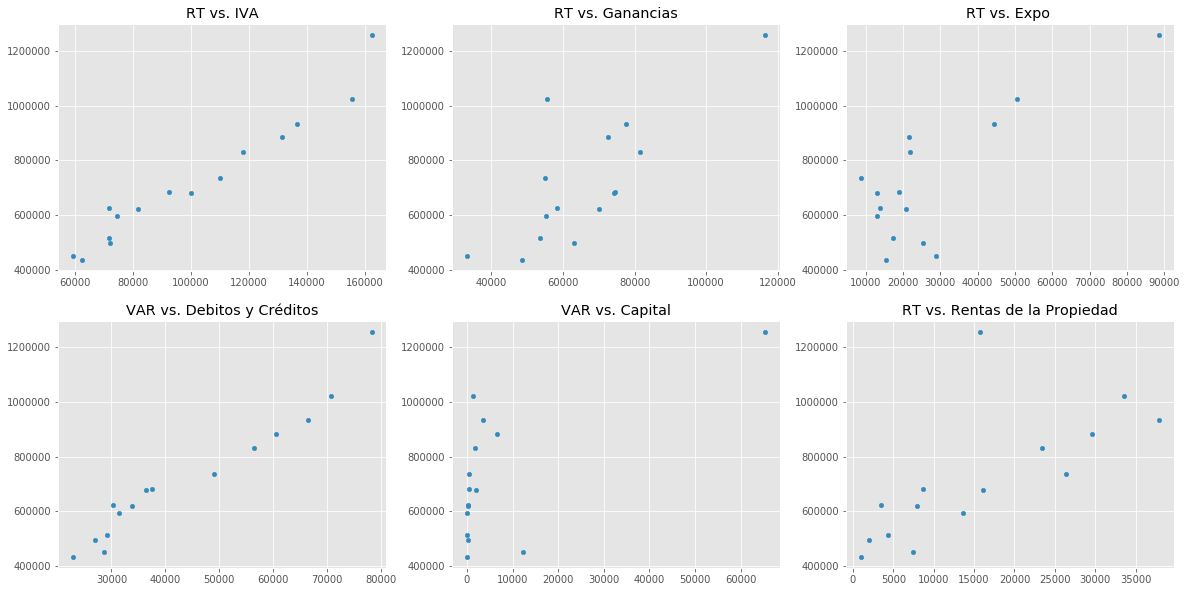

In [270]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

reca_total_trim.plot.scatter("iva_neto_reintegros", "total_recaudacion", ax=axes[0,0], title="RT vs. IVA")
reca_total_trim.plot.scatter("ganancias", "total_recaudacion", ax=axes[0,1], title="RT vs. Ganancias")
reca_total_trim.plot.scatter("derechos_exportacion", "total_recaudacion", ax=axes[0,2], title="RT vs. Expo ")

reca_total_trim.plot.scatter("debitos_creditos", "total_recaudacion", ax=axes[1,0], title="VAR vs. Debitos y Créditos")
reca_total_trim.plot.scatter("ingresos_capital", "total_recaudacion", ax=axes[1,1], title="VAR vs. Capital")
reca_total_trim.plot.scatter("resto_rentas_propiedad.1", "total_recaudacion", ax=axes[1,2], title="RT vs. Rentas de la Propiedad")

# elimina los labels de los ejes para que se vea mejor
for row in axes:
    for ax in row:
        pass
        ax.set_xlabel("")
        ax.set_ylabel("")


In [272]:
reca_total_trim.corr()

,total_recaudacion,aportes_contribuciones_seguridad_social,bienes_personales,combustibles,debitos_creditos,derechos_exportacion,derechos_importacion,ganancias,impuestos_internos,ingresos_capital,iva_neto_reintegros,resto_rentas_propiedad,resto_tributarios,resto_rentas_propiedad.1,Otros conceptos
total_recaudacion,1.000000,0.959317,0.114458,0.798683,0.970714,0.775795,0.917809,0.763660,0.812342,0.632706,0.972359,0.708910,0.108724,0.708910,0.984097
aportes_contribuciones_seguridad_social,0.959317,1.000000,0.010722,0.801107,0.955884,0.648052,0.913457,0.625572,0.857666,0.478954,0.975159,0.797282,0.000961,0.797282,0.937001
bienes_personales,0.114458,0.010722,1.000000,0.266313,0.001793,0.230591,0.044454,0.571861,0.076732,0.299532,0.064232,-0.313996,-0.130882,-0.313996,0.201649
combustibles,0.798683,0.801107,0.266313,1.000000,0.743952,0.427032,0.788751,0.733625,0.855711,0.265793,0.798608,0.598423,0.113632,0.598423,0.787080
debitos_creditos,0.970714,0.955884,0.001793,0.743952,1.000000,0.736752,0.954914,0.651621,0.762549,0.537053,0.985086,0.820513,-0.022609,0.820513,0.949223
derechos_exportacion,0.775795,0.648052,0.230591,0.427032,0.736752,1.000000,0.576275,0.629831,0.387846,0.844489,0.704577,0.308016,-0.012323,0.308016,0.806433
derechos_importacion,0.917809,0.913457,0.044454,0.788751,0.954914,0.576275,1.000000,0.675728,0.759466,0.414233,0.952969,0.837763,-0.049243,0.837763,0.892945
ganancias,0.763660,0.625572,0.571861,0.733625,0.651621,0.629831,0.675728,1.000000,0.625964,0.676723,0.677374,0.280377,0.086118,0.280377,0.804694
impuestos_internos,0.812342,0.857666,0.076732,0.855711,0.762549,0.387846,0.759466,0.625964,1.000000,0.198462,0.818550,0.719767,0.195436,0.719767,0.761242
ingresos_capital,0.632706,0.478954,0.299532,0.265793,0.537053,0.844489,0.414233,0.676723,0.198462,1.000000,0.501904,0.044656,0.055003,0.044656,0.680668
